#Fire up graphlab create

In [1]:
import graphlab

/Users/Marku/anaconda/envs/gl-env/lib/python2.7/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory
  stacklevel=stacklevel + 1):


#Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = graphlab.SFrame('home_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to markuvinicius@gmail.com and will expire on May 19, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1495759780.log


In [ ]:
sales

# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

In [3]:
graphlab.canvas.set_target('ipynb')
#graphlab.canvas.set_target('ipynb')

In [4]:
sales.show(view="Scatter Plot", x="sqft_living", y="price")

#Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [ ]:
train_data,test_data = sales.random_split?
#train_data,test_data = sales.random_split(.8,seed=0)

In [5]:
train_data,test_data = sales.random_split(fraction=.8,seed=0)

##Build the regression model using only sqft_living as a feature

In [6]:
print(len(train_data))
print(len(test_data))

17384
4229


In [7]:
train_data.show()
#test_data.show()

In [8]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.016495     | 4349521.926170     | 262943.613754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

#Evaluate the simple model

In [9]:
print test_data['price'].mean()

543054.042563


In [10]:
print sqft_model.evaluate(test_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}


RMSE of about \$255,170!

#Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

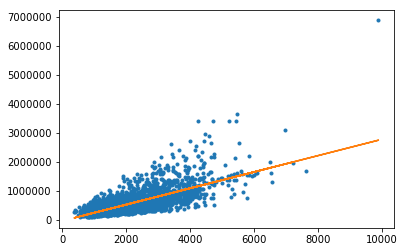

In [12]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [13]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-47114.0206702,4923.34437753
sqft_living,None,281.957850166,2.16405465323


#Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [14]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [15]:
sales[my_features].show()

In [ ]:
graphlab.canvas.set_target('ipynb')
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

#Build a regression model with more features

In [16]:
my_features_model = graphlab.linear_regression.create(dataset=train_data,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16576

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 114

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.035442     | 3743387.257275     | 1307658.411612       | 183104.382955 | 163485.088690   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [17]:
print test_data['price'].mean()

543054.042563


In [21]:
print len(test_data)
print sqft_model

4229
Class                          : LinearRegression

Schema
------
Number of coefficients         : 2
Number of examples             : 17384
Number of feature columns      : 1
Number of unpacked features    : 1

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.022

Settings
--------
Residual sum of squares        : 1.20191835634e+15
Training RMSE                  : 262943.6138

Highest Positive Coefficients
-----------------------------
sqft_living                    : 281.9579

Lowest Negative Coefficients
----------------------------
(intercept)                    : -47114.0207



In [22]:
print my_features_model.get('coefficients')

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -88114.6889991 | 13520.4114753 |
|   bedrooms  |   2   | 22459.9929236  | 5034.35544501 |
|   bedrooms  |   4   | -42901.0390067 | 3712.50832644 |
|   bedrooms  |   5   | -94544.1477741 |  6348.000289  |
|   bedrooms  |   1   | 52084.4287467  | 16460.4968025 |
|   bedrooms  |   6   | -183542.809635 | 13337.1033837 |
|   bedrooms  |   7   | -371649.666415 | 34151.1894367 |
|   bedrooms  |   8   | -349626.09514  | 57019.5026396 |
|   bedrooms  |   0   | -11661.4729149 | 70608.9428469 |
|   bedrooms  |   9   | -341274.139643 | 93130.5803242 |
+-------------+-------+----------------+---------------+
[114 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


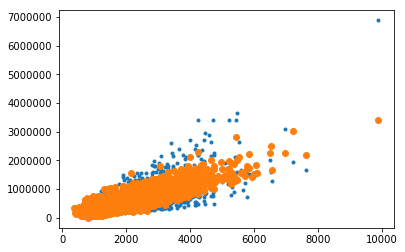

In [24]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],my_features_model.predict(test_data),'o')

##Comparing the results of the simple model with adding more features

In [25]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}
{'max_error': 3485736.9300049217, 'rmse': 179795.84814915824}


In [26]:
my_features_model

Class                          : LinearRegression

Schema
------
Number of coefficients         : 114
Number of examples             : 16576
Number of feature columns      : 6
Number of unpacked features    : 6

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0505

Settings
--------
Residual sum of squares        : 5.55747116791e+14
Training RMSE                  : 183104.383

Highest Positive Coefficients
-----------------------------
bathrooms[8]                   : 1729056.4369
zipcode[98039]                 : 1160297.6542
bathrooms[5.75]                : 1140906.2669
bathrooms[6]                   : 1041286.7214
bathrooms[5.5]                 : 767772.8595

Lowest Negative Coefficients
----------------------------
be

The RMSE goes down from \$255,170 to \$179,508 with more features.

#Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [34]:
graphlab.canvas.set_target('browser')
test_data.show()

Canvas is accessible via web browser at the URL: http://localhost:60912/index.html
Opening Canvas in default web browser.


In [27]:
house1 = sales[sales['id']=='5309101200']

In [28]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [29]:
print house1['price']

[620000, ... ]


In [30]:
print sqft_model.predict(house1)

[629584.8197281545]


In [31]:
print my_features_model.predict(house1)

[722726.047185142]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [35]:
house2 = sales[sales['id']=='1925069082']

In [36]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [37]:
print sqft_model.predict(house2)

[1261170.404099968]


In [38]:
print my_features_model.predict(house2)

[1437917.486755461]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

##Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [39]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [41]:
print my_features_model.predict(graphlab.SFrame(bill_gates))
print sqft_model.predict(graphlab.SFrame(bill_gates))

[13785025.964848213]
[14050778.487629194]


The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

In [ ]:
bill_gates